## Life cycle of Machine learning Project
1. Understanding the problem statement 
2. Data Collection
3. Exploratory Data Analysis
4. Data Cleaning
5. Data Pre-Processing
6. Model Training

* Target variable:
* price : Price of the given Diamond

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
# Data Ingestions step
df = pd.read_csv('Diamond_Price_Prediction.csv')

In [3]:
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#Show the top 5 records
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#Check Missing value
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* No missing values present in the data

In [6]:
#Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#descriptive summary of the dataset
df.describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26969.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13484.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26969.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40454.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53939.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#shape of the dataset
df.shape

(53940, 11)

In [9]:
#Check column names
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [10]:
#drop the id column
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
#check the data type of every columns
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
#check for duplicated records
df.duplicated().sum()

146

In [14]:
# drop duplicates and create a new DataFrame
df_no_duplicates = df.drop_duplicates()

# print the new DataFrame
print(df_no_duplicates)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


In [15]:
## segregate numerical and categorical columns
numerical_columns=df.columns[df.dtypes!='object']

categorical_columns=df.columns[df.dtypes=='object']

print(f'Numerical columns: {numerical_columns}')
print(f'Categorical Columns: {categorical_columns}')

Numerical columns: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [16]:
df[categorical_columns].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [17]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [18]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [19]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## Histplot on Numerical columns.

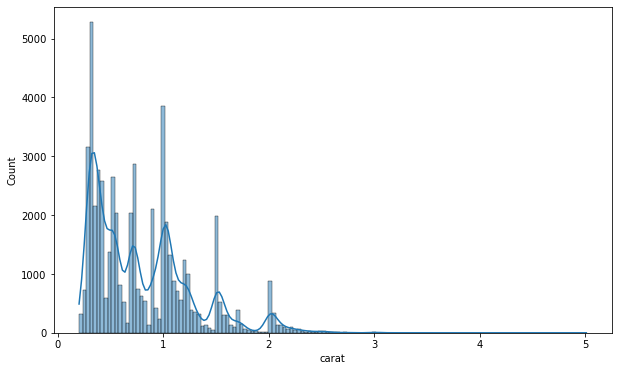

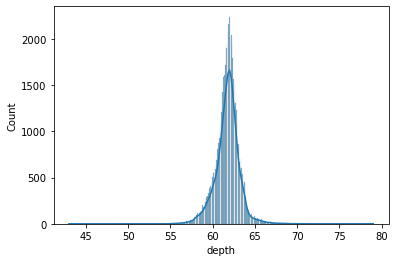

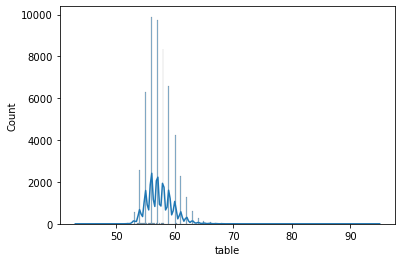

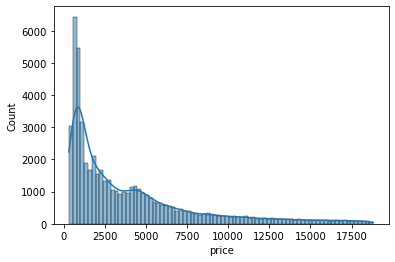

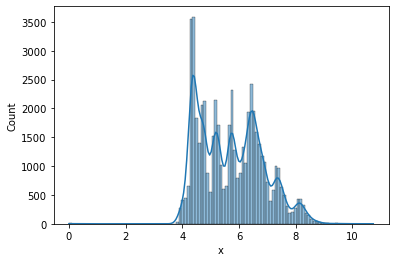

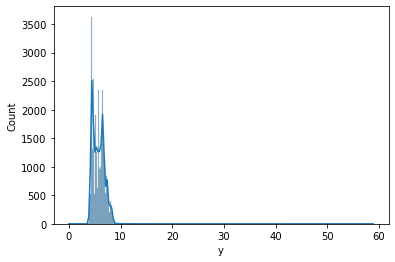

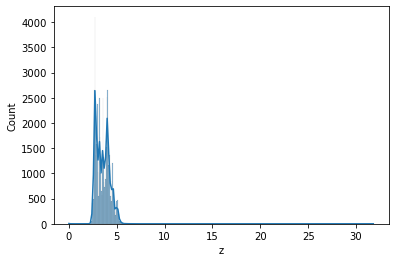

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print()
    plt.show()

<AxesSubplot:>

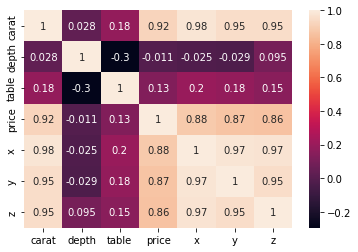

In [21]:
#Check correlation
sns.heatmap(df.corr(), annot=True)

In [22]:
#Currently we will not execute this
#df.drop(labels=['x','y','z'],axis=1)

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
#Check unique in cut column
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [25]:
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [26]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [27]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [28]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [29]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [30]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75


# Model Training

In [32]:
X = df.drop(labels=['price'],axis=1)

Y = df[['price']]

In [33]:
Y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [34]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns

numerical_cols = X.select_dtypes(exclude='object').columns

In [35]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']

color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [36]:
from sklearn.impute import SimpleImputer ## Handling Missing Values.
from sklearn.preprocessing import StandardScaler # Handling Feature Scaling.
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding.

#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
#Numerical Pipeline
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

# Categorigal Pipeline
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
               ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
               ('scaler',StandardScaler())])

preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,numerical_cols),
                                  ('cat_pipeline',cat_pipeline,categorical_cols)])

## Train test split

In [38]:
#Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [39]:
#Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [41]:
regression.coef_

array([[10833.64452368,   123.89487619,  -324.43513593,   501.64425375,
          -85.295421  ,   -28.27039246,  -905.36763097,    32.38294639,
          -26.63138913]])

In [42]:
regression.intercept_

array([5930.59066139])

In [43]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
## Train multiple models
models = {'LinearRegression':LinearRegression(), 'Lasso':Lasso(), 'Ridge':Ridge(),'ElasticNet':ElasticNet()}
trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

     #Make Predictions
    y_pred = model.predict(X_test)
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    r2_list.append(r2_square)
    print('='*30)
    print()  #Newline 

LinearRegression
Model Training Performance
RMSE: 1217.9378815056311
MAE: 808.4967647773293
R2 score 90.75082981539356

Lasso
Model Training Performance
RMSE: 1217.6911591752678
MAE: 810.7249333557039
R2 score 90.75457671533343

Ridge
Model Training Performance
RMSE: 1217.8637978797808
MAE: 808.9438357233588
R2 score 90.7519549815191

ElasticNet
Model Training Performance
RMSE: 1749.5926225605283
MAE: 1157.6598649390562
R2 score 80.91349673321345



Based on the performance metrics provided for each model on the training data:

- Linear Regression, Lasso, and Ridge models have similar RMSE, MAE, and R2 scores, which indicates that they have similar accuracy and ability to explain the variance in the data.
- The ElasticNet model has a significantly higher RMSE and MAE and a lower R2 score, indicating that it may not be as accurate or effective at explaining the variance in the data compared to the other models.

Therefore, the conclusion is that Linear Regression, Lasso, and Ridge models may be equally suitable for this particular dataset, while the ElasticNet model may not be the best choice. However, it is also important to evaluate the models on a separate test dataset to ensure that they are not overfitting to the training data.

In [ ]:
model_list